# State schema

In [1]:
from google.colab import userdata
api_key = userdata.get("GEMINI_API_KEY")

In [2]:
%%capture --no-stderr
%pip isntall --quiet -U langgraph
%pip install -q langchain-google-genai
%pip install -q -U langchain_core langchain_community

# Schema
- when communicate with nodes we use schema
-e.g: storage through schama
type also through the schema

- it allows you to specify keys and their corresponding values type

In [3]:
from typing_extensions import TypedDict
class TypedDictState(TypedDict):
  foo: int
  bar: int

In [4]:
choco_bars:TypedDict = TypedDictState(company="choco", bar = "M&Ms")
print(choco_bars["bar"])
print(choco_bars["company"])

M&Ms
choco


# problem
on runtime

- we are passing different key
- and it also providing the answer without checking the datatype


In [6]:
from typing import Literal
class TypedDictState(TypedDict):
  name: int
  mood: Literal["happy","sad"]


In [8]:
override_mood : TypedDictState = TypedDictState(name="hanzla",mood ="sad" ,random_field  = "user")
override_mood["mood"]
print(override_mood)

{'name': 'hanzla', 'mood': 'sad', 'random_field': 'user'}


In [10]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 17.4 MB/s eta 0:00:00


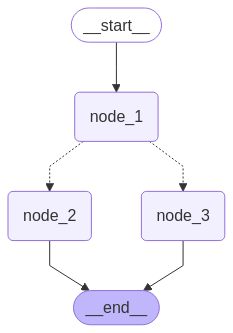

In [11]:
import random
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

def node_1(state):
    print("---Node 1---")
    return {"name": state['name'] + " is ... "}

def node_2(state):
    print("---Node 2---")
    return {"mood": "happy"}

def node_3(state):
    print("---Node 3---")
    return {"mood": "sad"}

def decide_mood(state) -> Literal["node_2", "node_3"]:

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"

    # 50% of the time, we return Node 3
    return "node_3"

# Build graph
builder = StateGraph(TypedDictState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)

# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({"name":"hanzla"})

---Node 1---
---Node 3---


{'name': 'hanzla is ... ', 'mood': 'sad'}

# dataclasses


In [17]:
!pip install dataclass

ERROR: Could not find a version that satisfies the requirement dataclass (from versions: none)
ERROR: No matching distribution found for dataclass


In [18]:
from dataclasses import dataclass
@dataclass
class DataclassState:
  name:str
  mood: Literal["happy","sad"]

In [21]:
no_name: DataclassState = DataclassState(name = "hanzla",mood="mad")